In [161]:
from functools import reduce
import pandas as pd
import calendar
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.close('all')

In [162]:
# I analyze some dataset about the COVID pandemic. 
# I want to understand if the trend of cases/deaths has been impacted by different government measures. 
# Particularly if the different time when they have been implemented had an impact on the trend in the different countries.
# I used three different dataset: 1- Measures governement dataset provided by ACAPS; 2- Time series of confirmed cases provided
# by CSSE (John Hopkins); 3- Time series of deaths provided by CSSE (John Hopkins)

# loading the 3 files in dataframe

measures = pd.read_csv('C:\\Users\\Romina\\Desktop\\DBSCourse\\ProgrammingBigData\\CA4\\acaps_covid19_government_measures_dataset.csv', sep = ';', encoding = 'latin1')
cases = pd.read_csv('C:\\Users\\Romina\\Desktop\\DBSCourse\\ProgrammingBigData\\CA4\\time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('C:\\Users\\Romina\\Desktop\\DBSCourse\\ProgrammingBigData\\CA4\\time_series_covid19_deaths_global.csv')

In [163]:
# Let's have a look at the measures dataset
measures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11200 entries, 0 to 11199
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  11200 non-null  int64  
 1   COUNTRY             11200 non-null  object 
 2   ISO                 11200 non-null  object 
 3   ADMIN_LEVEL_NAME    1192 non-null   object 
 4   PCODE               0 non-null      float64
 5   REGION              11200 non-null  object 
 6   LOG_TYPE            11200 non-null  object 
 7   CATEGORY            11200 non-null  object 
 8   MEASURE             11200 non-null  object 
 9   TARGETED_POP_GROUP  11200 non-null  object 
 10  COMMENTS            11056 non-null  object 
 11  NON_COMPLIANCE      9969 non-null   object 
 12  DATE_IMPLEMENTED    10924 non-null  object 
 13  SOURCE              11181 non-null  object 
 14  SOURCE_TYPE         11187 non-null  object 
 15  LINK                11169 non-null  object 
 16  ENTR

In [164]:
# In the dataset there are two different types of measures (attribute LOG_TYPE): 1-'Introduction/extensions of measures' ,
# 2- Phase-out measures. I decided to analyze the first type because they are that ones implemented to stop/slow the spread

measures = measures[measures['LOG_TYPE'].isin(['Introduction / extension of measures'])]

# The measures falls in 6 different categories (attribute CATEGORY)
measures.CATEGORY.unique()

array(['Public health measures', 'Governance and socio-economic measures',
       'Social distancing', 'Movement restrictions', 'Lockdown',
       'Humanitarian exemption'], dtype=object)

In [165]:
# In the dataframe information I see that some rows have the 'Date Implemented' attribute empty (10924 non-null over 11200 total rows)
# I decided to filter out the rows with empty Date_implemented because this attribute is strategic for my analysis

measures = measures.dropna(axis=0, subset=['DATE_IMPLEMENTED'])

In [166]:
# I isolate the attribute I'm interested in (country, region, date implementation, measure category)

measures_by_country = measures.filter(['COUNTRY','REGION','CATEGORY','DATE_IMPLEMENTED'], axis=1)
measures_by_country.head(5)

,COUNTRY,REGION,CATEGORY,DATE_IMPLEMENTED
0,Afghanistan,Asia,Public health measures,12/02/2020
1,Afghanistan,Asia,Public health measures,12/02/2020
2,Afghanistan,Asia,Public health measures,12/02/2020
3,Afghanistan,Asia,Governance and socio-economic measures,12/02/2020
4,Afghanistan,Asia,Social distancing,12/03/2020


In [167]:
# I calculate the measures frequency for each category, country and date_implemented
measures_by_country = measures_by_country.groupby(['COUNTRY','REGION','DATE_IMPLEMENTED','CATEGORY']).size().unstack(fill_value=0)

In [168]:
measures_by_country.head(5)

CATEGORY                             Governance and socio-economic measures  \
COUNTRY     REGION DATE_IMPLEMENTED                                           
Afghanistan Asia   01/02/2020                                             0   
                   01/03/2020                                             1   
                   01/04/2020                                             0   
                   02/02/2020                                             0   
                   02/03/2020                                             0   

CATEGORY                             Humanitarian exemption  Lockdown  \
COUNTRY     REGION DATE_IMPLEMENTED                                     
Afghanistan Asia   01/02/2020                             0         0   
                   01/03/2020                             0         0   
                   01/04/2020                             0         0   
                   02/02/2020                             0         0   
                   02/03/2020                             0         0   

CATEGORY                             Movement restrictions  \
COUNTRY     REGION DATE_IMPLEMENTED                          
Afghanistan Asia   01/02/2020                            1   
                   01/03/2020                            1   
                   01/04/2020                            1   
                   02/02/2020                            0   
                   02/03/2020                            0   

CATEGORY                             Public health measures  Social distancing  
COUNTRY     REGION DATE_IMPLEMENTED                                             
Afghanistan Asia   01/02/2020                             0                  0  
                   01/03/2020                             1                  2  
                   01/04/2020                             0                  0  
                   02/02/2020                             2                  0  
                   02/03/2020                             1                  0

In [169]:
# I rename some columns and reset the index of dataframe

measures_by_country = measures_by_country.reset_index().rename_axis(None, axis=1)
measures_by_country = measures_by_country.rename(str.lower, axis='columns')
measures_by_country = measures_by_country.rename(columns={"date_implemented": "date"})

In [170]:
# Let's have a look at the cases and deaths dataframe

cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 129 entries, Province/State to 5/25/20
dtypes: float64(2), int64(125), object(2)
memory usage: 268.2+ KB


In [171]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 129 entries, Province/State to 5/25/20
dtypes: float64(2), int64(125), object(2)
memory usage: 268.2+ KB


In [172]:
cases.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,933,946,948,949,964,969,981,989,998,1004
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,762,762,762,762,762,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,50,52,52,58,60,61,69,70


In [173]:
deaths.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,168,169,173,178,187,193,205,216,218,219
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,32,32
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,542,548,555,561,568,575,582,592,600,609
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,3,3,4,4,4


In [174]:
# The dataframes are series with cumulative data organized in the columns. Each row represents a different country
# The attribute Province/State is used for the overseas territorial collectivity that belong to the Country.
# As I'm interested in the data for the main country, I filter out this Province/State

cases = cases[cases['Province/State'].isnull()]
deaths = deaths[deaths['Province/State'].isnull()]

In [175]:
# I remove the unenecessary columns 

cases = cases.drop(['Province/State', 'Lat','Long'], axis=1)
deaths =  deaths.drop(['Province/State', 'Lat','Long'], axis=1)

In [176]:
# Before joining the three dataframe , I reshape the Cases and Death dataframe in order to trasform the date and the figures
# as rows details
# Reshaping for the dataframe cases. I remove the dates with 0 cases/deaths

cases_n = (cases.set_index(["Country/Region"])
         .stack()
         .reset_index(name='Cases')
         .rename(columns={'level_1':'date'}))

cases_n = cases_n[cases_n['Cases'] > 0]

cases_n.head(5)

,Country/Region,date,Cases
33,Afghanistan,2/24/20,1
34,Afghanistan,2/25/20,1
35,Afghanistan,2/26/20,1
36,Afghanistan,2/27/20,1
37,Afghanistan,2/28/20,1


In [177]:
# Reshaping for the dataframe deaths

deaths_n = (deaths.set_index(["Country/Region"])
         .stack()
         .reset_index(name='Deaths')
         .rename(columns={'level_1':'date'}))

deaths_n = deaths_n[deaths_n['Deaths'] > 0]

deaths_n.head(5)

,Country/Region,date,Deaths
60,Afghanistan,3/22/20,1
61,Afghanistan,3/23/20,1
62,Afghanistan,3/24/20,1
63,Afghanistan,3/25/20,2
64,Afghanistan,3/26/20,4


In [178]:
# The date attribute has a different format (m/d/yy) of the date attribute of measures_by_country (dd/mm/yyyy) dataframe
# I rename the column Country/Region before the join

cases_n['date'] = pd.to_datetime(cases_n['date']).dt.strftime('%d/%m/%Y')
cases_n = cases_n.rename(columns={"Country/Region": "country"})

In [179]:
deaths_n['date'] = pd.to_datetime(deaths_n['date']).dt.strftime('%d/%m/%Y')
deaths_n = deaths_n.rename(columns={"Country/Region": "country"})

In [180]:
# I join the three dataframe with a right inner join because the date field. The deaths and cases dataframe contains daily information
# The measures datframe is based on measure date implementation. If at least one measure is not implemented for each day, 
# some dates cannot be available for each country. In order to avoid loosing data for deaths and cases dataframe the right join
# has been implemented

dfs = [measures_by_country, cases_n, deaths_n]

data = reduce(lambda left,right: pd.merge(left,right, how = 'right', on=['country','date']), dfs)

In [181]:
# Let's have a look at the new dataframe

data.head(5)

,country,region,date,governance and socio-economic measures,humanitarian exemption,lockdown,movement restrictions,public health measures,social distancing,Cases,Deaths
0,Afghanistan,Asia,01/04/2020,0.0,0.0,0.0,1.0,0.0,0.0,237,4
1,Afghanistan,Asia,02/04/2020,0.0,0.0,0.0,0.0,1.0,0.0,273,6
2,Afghanistan,Asia,03/04/2020,0.0,0.0,0.0,0.0,1.0,0.0,281,6
3,Afghanistan,Asia,07/04/2020,0.0,0.0,0.0,0.0,1.0,0.0,423,14
4,Afghanistan,Asia,12/05/2020,0.0,0.0,0.0,0.0,1.0,0.0,4963,127


In [182]:
# I want to analyze data for the European countries and I remove the redundant column Region

data = data[data['region'].isin(['Europe'])]

data =  data.drop(['region'], axis=1)

In [183]:
# I add a new column with the total of measures for each country and date
col_list= list(data)

col_list.remove('Cases')
col_list.remove('Deaths')


data['measures_tot'] = data[col_list].sum(axis=1)


In [184]:
# I add a column with the month extracted from date attribute (I will use the month in the plots)

data['date'] = pd.to_datetime(data['date'], format= '%d/%m/%Y')
data['month_date'] = pd.DatetimeIndex(data['date']).month

data['month_date'] = data['month_date'].apply(lambda x: calendar.month_abbr[x])

In [185]:
data.head(5)

,country,date,governance and socio-economic measures,humanitarian exemption,lockdown,movement restrictions,public health measures,social distancing,Cases,Deaths,measures_tot,month_date
10,Albania,2020-04-02,1.0,0.0,1.0,0.0,0.0,0.0,277,16,2.0,Apr
11,Albania,2020-03-11,1.0,0.0,0.0,0.0,1.0,0.0,12,1,2.0,Mar
12,Albania,2020-03-12,1.0,0.0,0.0,0.0,0.0,0.0,23,1,1.0,Mar
13,Albania,2020-03-13,0.0,0.0,0.0,1.0,0.0,0.0,33,1,1.0,Mar
14,Albania,2020-04-13,0.0,0.0,1.0,3.0,0.0,0.0,467,23,4.0,Apr


In [186]:
# I want to plot the # of measures implemented by each countries in the different months
# I make a new dataframe in which the deaths, cases and measures are aggregated by country and month
# As the deaths and cases are cumulated on month base, I decide to take the max value for each month

data_country_month = data.groupby(['country', 'month_date']).agg({'Deaths':'max','Cases' : 'max', 'measures_tot' : 'sum'})
data_country_month = data_country_month.reset_index()
data_country_month.head(5)

,country,month_date,Deaths,Cases,measures_tot
0,Albania,Apr,31,773,7.0
1,Albania,Mar,11,223,28.0
2,Austria,Apr,584,15452,52.0
3,Austria,Mar,128,10180,36.0
4,Austria,May,628,16109,11.0


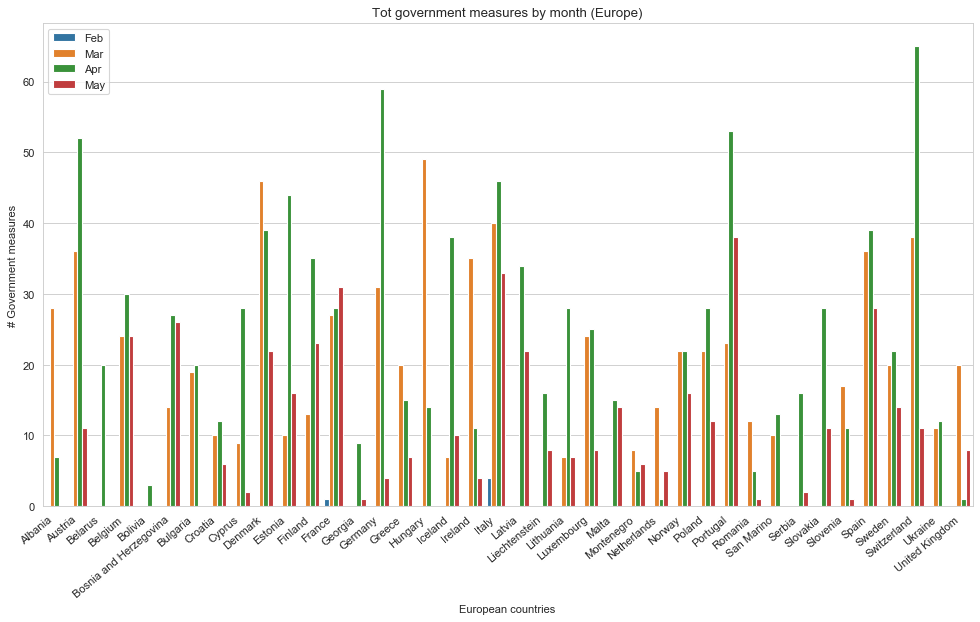

In [187]:
plt.figure(figsize=(15,8), dpi= 80)
bx = sns.barplot(x='country', y='measures_tot', hue = 'month_date', data=data_country_month, hue_order = ['Feb','Mar','Apr','May'])
bx.set_xticklabels(bx.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("European countries")
plt.ylabel("# Government measures")
plt.legend(loc='upper left')
plt.title("Tot government measures by month (Europe)") 
plt.show(bx)

In [188]:
# There are some countries with peaks in April (switzerland, Portugal, Germany), 
# some other instead with peak of measures on March (Denmark, Hungary, Italy)
# I want to analyze a subset of countries. I decided to isolate the top 10 countries by measures (the top 10 countries for 
# the total of measures implemented)

# the dataframe below contains the total measures for each country
measures_by_country = data.groupby(['country']).agg({'measures_tot' : 'sum'})
measures_by_country = measures_by_country.reset_index()

# I create a new dataframe with the top 10 countries
top10_countries = measures_by_country.sort_values('measures_tot', ascending = False).head(10)

# I cretae a new dataframe with the granularity of original 'data' dataframe containing only the top 10 countries
data_top10country_month = data_country_month[data_country_month['country'].isin(top10_countries['country'])]

In [189]:
# I want to plot the #measures, deaths and cases for the top 10 countries
# To plot the deaths and cases as trend lines I create two new subset and reshape them ( bring the countries as columns)

top10_deaths = data_top10country_month.filter(['month_date','country', 'Deaths'])
top10_deaths = pd.pivot_table(top10_deaths, values = 'Deaths', index = 'month_date', columns = 'country').reset_index()
top10_deaths.head(5)

country,month_date,Austria,Belgium,Denmark,Finland,France,Germany,Italy,Portugal,Spain,Switzerland
0,Apr,584.0,7331.0,427.0,206.0,23629.0,6623.0,27967.0,854.0,23822.0,1737.0
1,Feb,NaN,NaN,NaN,NaN,2.0,NaN,10.0,NaN,NaN,NaN
2,Mar,128.0,705.0,90.0,17.0,3523.0,645.0,12428.0,119.0,8464.0,433.0
3,May,628.0,9080.0,537.0,293.0,27485.0,7897.0,32007.0,1231.0,27709.0,1878.0


In [190]:
top10_cases = data_top10country_month.filter(['month_date','country','Cases'])
top10_cases = pd.pivot_table(top10_cases, values = 'Cases', index = 'month_date', columns = 'country').reset_index()
top10_cases.head(5)

country,month_date,Austria,Belgium,Denmark,Finland,France,Germany,Italy,Portugal,Spain,Switzerland
0,Apr,15452.0,47334.0,8698.0,4906.0,167605.0,163009.0,205463.0,22797.0,213024.0,29586.0
1,Feb,NaN,NaN,NaN,NaN,100.0,NaN,322.0,NaN,NaN,NaN
2,Mar,10180.0,12775.0,2860.0,1418.0,52128.0,66885.0,105792.0,5962.0,95923.0,16605.0
3,May,16109.0,55559.0,10791.0,6228.0,177319.0,175233.0,225886.0,29209.0,231606.0,30514.0


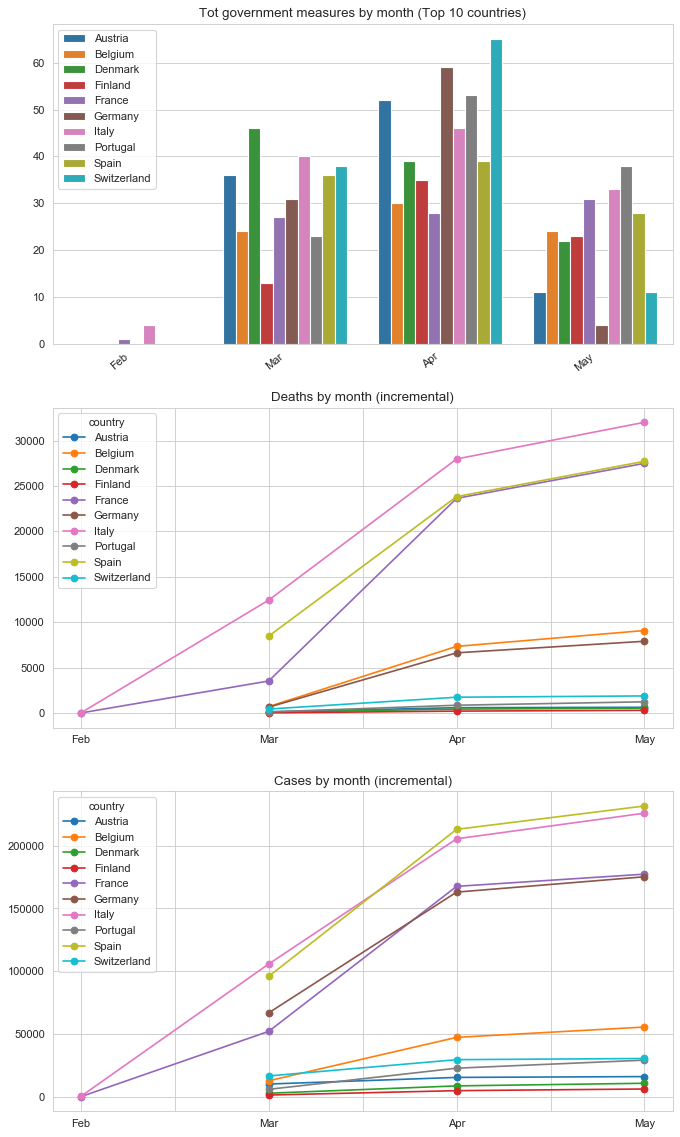

In [191]:
fig, (ax1, ax2, ax3 ) = plt.subplots(3, 1,figsize=(10,18), dpi= 80)
bx = sns.barplot(x='month_date', y='measures_tot', hue = 'country', data=data_top10country_month, order = ['Feb','Mar','Apr','May'], ax = ax1)
bx.set_xticklabels(bx.get_xticklabels(), rotation=40, ha="right")
ax1.set_ylabel ('')
ax1.set_xlabel ('')
ax1.title.set_text('Tot government measures by month (Top 10 countries)')
bx.legend(loc='upper left')

field = 'month_date'
month_ordered = ['Feb','Mar','Apr','May']
dx = top10_deaths.set_index(field).loc[month_ordered].plot(marker = "o", ax = ax2)
ax2.set_xlabel ('')
ax2.title.set_text('Deaths by month (incremental)')

cx = top10_cases.set_index(field).loc[month_ordered].plot(marker = "o", ax = ax3)
ax3.set_xlabel ('')
ax3.title.set_text('Cases by month (incremental)')

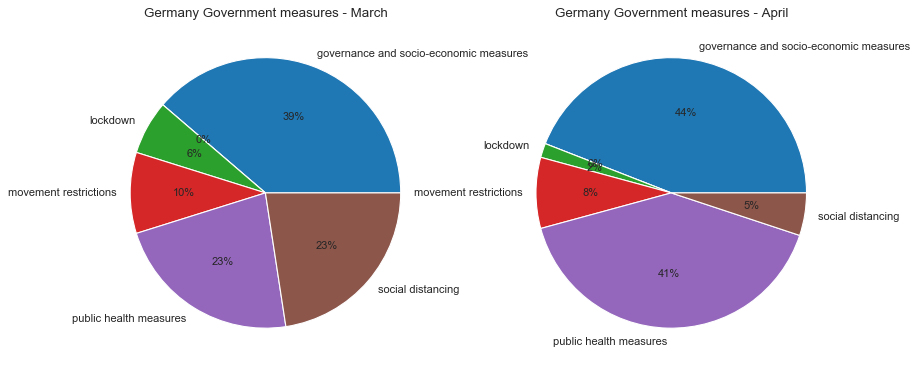

In [192]:
# I think that measures implemented during the month had delayed effects on deaths/cases confirmed
# I can see that countries as Portugal, Germany, Switzerland, Finland had a big jump of measures implemented between 
# March and April. 
# As measures implemented in April could have impact on deaths/cases during May, I can suppose that the increase
# of these measures have helped to flatten the death/cases curve for these countries.

# On the other side countries as Italy, Spain and France had not a big jump on measures implemented between March and April.
# For these countries the variance of deaths/cases between months has been huge.
# Germany is the country that could contradict my previous sentence because the huge increment of confirmed cases 
# between March and April despite the big jump of measures.
# For this reason I want to investigate the distribution of measures categories for this country.

data_Germany = data[data['country'].isin(['Germany'])]
data_Germany = data_Germany.drop(['country','date', 'measures_tot','Cases','Deaths'], axis=1)
data_Germany = data_Germany.groupby(['month_date']).sum()
data_Germany = data_Germany.T

fig, (ax1, ax2 ) = plt.subplots(1, 2,figsize=(12,18), dpi= 80)
pie_1 = data_Germany['Mar'].plot(kind = 'pie', autopct='%1.0f%%', pctdistance=0.6, ax = ax1)
ax1.set_ylabel ('')
ax1.title.set_text("Germany Government measures - March")

pie_2 = data_Germany['Apr'].plot(kind = 'pie', autopct='%1.0f%%', pctdistance=0.6, ax = ax2)
ax2.set_ylabel ('')
ax2.title.set_text("Germany Government measures - April")


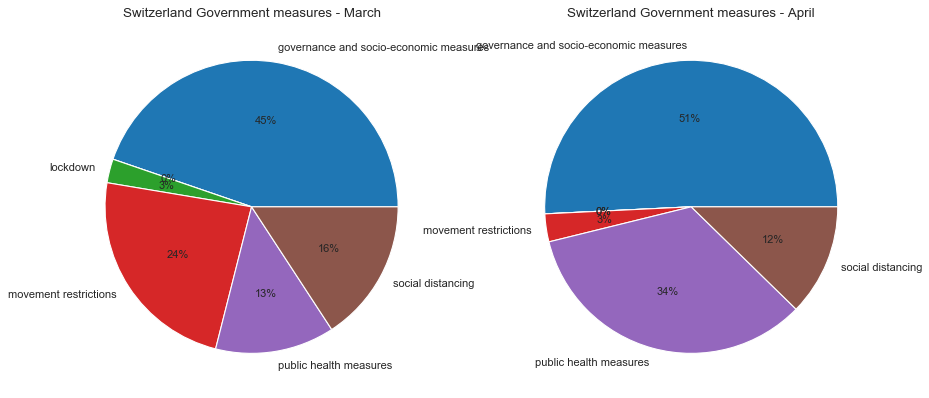

In [193]:
# The increase of German measures between March and April has to be attributed to two main categories: governance and socio-economic, 
# public health measures.
# In the 'Public health measures' category are included measures such as 'strenghtening the public health policy' and 'Testing policy'
# (attribute 'MEASURE' in the first dataset)
# This could be explain the huge increase of cases confirmed between March and April and instead a less variance
# on deaths for the German country.
# I investigate if the distribution of the categories is similar in other countries with low cases/deaths figures.
# I analyze the Switzerland situation

data_Switz = data[data['country'].isin(['Switzerland'])]
data_Switz = data_Switz.drop(['country','date', 'measures_tot','Cases','Deaths'], axis=1)
data_Switz = data_Switz.groupby(['month_date']).sum()
data_Switz = data_Switz.T

fig, (ax1, ax2 ) = plt.subplots(1, 2,figsize=(13,20), dpi= 80)
pie_1 = data_Switz['Mar'].plot(kind = 'pie', autopct='%1.0f%%', pctdistance=0.6, ax = ax1)
ax1.set_ylabel ('')
ax1.title.set_text("Switzerland Government measures - March")

pie_2 = data_Switz['Apr'].plot(kind = 'pie', autopct='%1.0f%%', pctdistance=0.6, ax = ax2)
ax2.set_ylabel ('')
ax2.title.set_text("Switzerland Government measures - April")

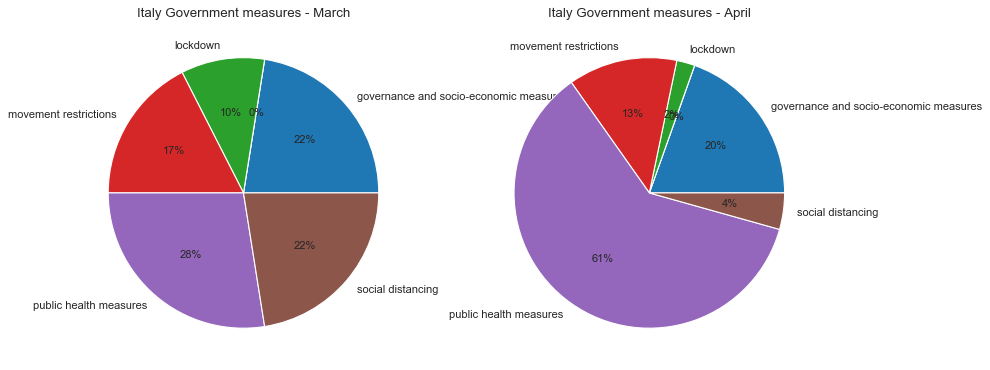

In [194]:
# For Switzerland the 'governance and socio-economic category' measures were the 50% of all the measures implemented
# As in Germany they seem , together the poublic health measures, the main important measures categories

# let's have a look at the countries with bigger case/deaths increase. I take the Italian example

data_Italy = data[data['country'].isin(['Italy'])]
data_Italy = data_Italy.drop(['country','date', 'measures_tot','Cases','Deaths'], axis=1)
data_Italy = data_Italy.groupby(['month_date']).sum()
data_Italy = data_Italy.T

fig, (ax1, ax2 ) = plt.subplots(1, 2,figsize=(12,20), dpi= 80)
pie_1 = data_Italy['Mar'].plot(kind = 'pie', autopct='%1.0f%%', pctdistance=0.6, ax = ax1)
ax1.set_ylabel ('')
ax1.title.set_text("Italy Government measures - March")

pie_2 = data_Italy['Apr'].plot(kind = 'pie', autopct='%1.0f%%', pctdistance=0.6, ax = ax2)
ax2.set_ylabel ('')
ax2.title.set_text("Italy Government measures - April")

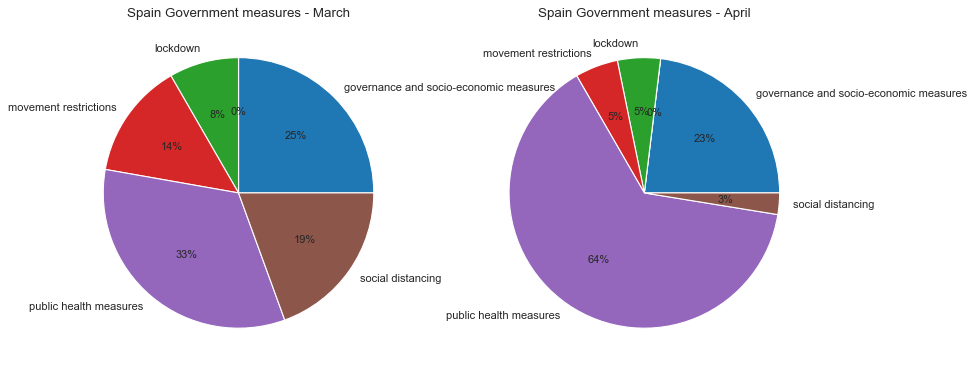

In [196]:
# In Italy the governance and socio-economic measures seem to be a lower proportion in the total measures and compared
# with Germany and Switzerland.
# Let's have a look at the Spanish situation

data_Spain = data[data['country'].isin(['Spain'])]
data_Spain = data_Spain.drop(['country','date', 'measures_tot','Cases','Deaths'], axis=1)
data_Spain = data_Spain.groupby(['month_date']).sum()
data_Spain = data_Spain.T

fig, (ax1, ax2 ) = plt.subplots(1, 2,figsize=(12,20), dpi= 80)
pie_1 = data_Spain['Mar'].plot(kind = 'pie', autopct='%1.0f%%', pctdistance=0.6, ax = ax1)
ax1.set_ylabel ('')
ax1.title.set_text("Spain Government measures - March")

pie_2 = data_Spain['Apr'].plot(kind = 'pie', autopct='%1.0f%%', pctdistance=0.6, ax = ax2)
ax2.set_ylabel ('')
ax2.title.set_text("Spain Government measures - April")

In [160]:
# Again the governance and socio-economic measures are lower than the first two countries analyzed.
# I note, moreover that the % of them has slightly decreased from March to April for Italy and Spain.
# For Germany and Switzerland, instead, the proportion has increased from March to April

# This suggests to me that a more deep analysis of measures implemented could suggest some winner measure that had
# a positive impact to slow-down the spread and the deaths cases.